# Homework 4: Unsupervised learning

**Author:** Javed Ali

In [58]:
# import all necessary libraries

# data wrangling and analysis
import numpy as np
import pandas as pd 
import math
from statistics import mean
import statistics
from scipy.spatial.distance import cdist

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# other
import random
import time
from tkinter import *


In [2]:
######################################################################
# This section contains functions for loading CSV (comma separated values)
# files and convert them to a dataset of instances.
# Each instance is a tuple of attributes. The entire dataset is a list
# of tuples.
######################################################################

# Loads a CSV files into a list of tuples.
# Ignores the first row of the file (header).
# Numeric attributes are converted to floats, nominal attributes
# are represented with strings.
# Parameters:
#   fileName: name of the CSV file to be read
# Returns: a list of tuples
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0] # remove the header
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

# Converts a comma separated string into a tuple
# Parameters
#   line: a string
# Returns: a tuple
def lineToTuple(line):
    # remove leading/trailing witespace and newlines
    cleanLine = line.strip()
    # get rid of quotes
    cleanLine = cleanLine.replace('"', '')
    # separate the fields
    lineList = cleanLine.split(",")
    # convert strings into numbers
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

# Destructively converts all the string elements representing numbers
# to floating point numbers.
# Parameters:
#   myList: a list of strings
# Returns None
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])

# Checks if a given string can be safely converted into a positive float.
# Parameters:
#   s: the string to be checked
# Returns: True if the string represents a positive float, False otherwise
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True


In [3]:
######################################################################
# This section contains functions for clustering a dataset
# using the k-means algorithm.
######################################################################

def distance(instance1, instance2):
    if instance1 == None or instance2 == None:
        return float("inf")
    sumOfSquares = 0
    for i in range(1, len(instance1)):
        sumOfSquares += (instance1[i] - instance2[i])**2
    return sumOfSquares

def Mdistance(instance1, instance2):
    if instance1 == None or instance2 == None:
        return float("inf")
    Manhattan = 0
    for i in range(1, len(instance1)):
        Manhattan += abs(instance1[i]-instance2[i])
    return Manhattan

#def mdistance(instance1, instance2):
#return sum(abs(a-b) for a,b in zip(x,y))

from scipy import spatial
def cdistance(x, y):
    from math import sqrt
    def dot_product(x, y):
        return sum(a * b for a, b in zip(x, y))
    def magnitude(vector):
        return sqrt(dot_product(vector, vector))
    def similarity(x, y):
        return (1-(dot_product(x, y) / (magnitude(x) * magnitude(y) + .00000000001)))
#def cdistance(x,y)
        #create normalized copies of each vector:
#    x_norm = np.linalg.norm(x)
#    y_norm = np.linalg.norm(y)
    #compute cosine similarity:
#    sim = np.dot(x, y)/(x_norm * y_norm) #this should return a scalar float
#    return sim
    
def jdistance(a,b):
    c = set(a).intersection(set(b))
    return (1- float(len(c)) / (len(a) + len(b) - len(c)))


def meanInstance(name, instanceList):
    numInstances = len(instanceList)
    if (numInstances == 0):
        return
    numAttributes = len(instanceList[0])
    means = [name] + [0] * (numAttributes-1)
    for instance in instanceList:
        for i in range(1, numAttributes):
            means[i] += instance[i]
    for i in range(1, numAttributes):
        means[i] /= float(numInstances)
    return tuple(means)

def assign(instance, centroids):
    minDistance = distance(instance, centroids[0])
    minDistanceIndex = 0
    for i in range(1, len(centroids)):
        d = distance(instance, centroids[i])
        if (d < minDistance):
            minDistance = d
            minDistanceIndex = i
    return minDistanceIndex

def Massign(instance, centroids):
    minDistance = Mdistance(instance, centroids[0])
    minDistanceIndex = 0
    for i in range(1, len(centroids)):
        d = Mdistance(instance, centroids[i])
        if (d < minDistance):
            minDistance = d
            minDistanceIndex = i
    return minDistanceIndex

def cassign(instance, centroids):
    minDistance = cdistance(instance, centroids[0])
    minDistanceIndex = 0
    for i in range(1, len(centroids)):
        d = cdistance(instance, centroids[i])
        if (d < minDistance):
            minDistance = d
            minDistanceIndex = i
    return minDistanceIndex

def jassign(instance, centroids):
    minDistance = jdistance(instance, centroids[0])
    minDistanceIndex = 0
    for i in range(1, len(centroids)):
        d = jdistance(instance, centroids[i])
        if (d < minDistance):
            minDistance = d
            minDistanceIndex = i
    return minDistanceIndex

def createEmptyListOfLists(numSubLists):
    myList = []
    for i in range(numSubLists):
        myList.append([])
    return myList

def assignAll(instances, centroids):
    clusters = createEmptyListOfLists(len(centroids))
    for instance in instances:
        clusterIndex = assign(instance, centroids)
        clusters[clusterIndex].append(instance)
    return clusters

def MassignAll(instances, centroids):
    clusters = createEmptyListOfLists(len(centroids))
    for instance in instances:
        clusterIndex = Massign(instance, centroids)
        clusters[clusterIndex].append(instance)
    return clusters

def cassignAll(instances, centroids):
    clusters = createEmptyListOfLists(len(centroids))
    for instance in instances:
        clusterIndex = cassign(instance, centroids)
        clusters[clusterIndex].append(instance)
    return clusters

def jassignAll(instances, centroids):
    clusters = createEmptyListOfLists(len(centroids))
    for instance in instances:
        clusterIndex = jassign(instance, centroids)
        clusters[clusterIndex].append(instance)
    return clusters

def computeCentroids(clusters):
    centroids = []
    for i in range(len(clusters)):
        name = "centroid" + str(i)
        centroid = meanInstance(name, clusters[i])
        centroids.append(centroid)
    return centroids

#Euclidean Similarity
def kmeans(instances, k, animation=False, initCentroids=None):
    result = {}
    if (initCentroids == None or len(initCentroids) < k):
        # randomly select k initial centroids
        random.seed(time.time())
        centroids = random.sample(instances, k)
    else:
        centroids = initCentroids
    prevCentroids = []
    if animation:
        delay = 1.0 # seconds
        canvas = prepareWindow(instances)
        clusters = createEmptyListOfLists(k)
        clusters[0] = instances
        paintClusters2D(canvas, clusters, centroids, "Initial centroids")
        time.sleep(delay)
    iteration = 0
    while (centroids != prevCentroids):
        iteration += 1
        clusters = assignAll(instances, centroids)
        if animation:
            paintClusters2D(canvas, clusters, centroids, "Assign %d" % iteration)
            time.sleep(delay)
        prevCentroids = centroids
        centroids = computeCentroids(clusters)
        withinss = computeWithinss(clusters, centroids)
        if animation:
            paintClusters2D(canvas, clusters, centroids,
                            "Update %d, withinss %.1f" % (iteration, withinss))
            time.sleep(delay)
    result["clusters"] = clusters
    result["centroids"] = centroids
    result["withinss"] = withinss
    result["sse"]=withinss
    result["iteration"] = iteration
    return result

def computeWithinss(clusters, centroids):
    result = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        cluster = clusters[i]
        for instance in cluster:
            result += distance(centroid, instance)
    return result

def McomputeWithinss(clusters, centroids):
    result = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        cluster = clusters[i]
        for instance in cluster:
            result += Mdistance(centroid, instance)
    return result

def ccomputeWithinss(clusters, centroids):
    result = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        cluster = clusters[i]
        for instance in cluster:
            result += cdistance(centroid, instance)
    return result

def jcomputeWithinss(clusters, centroids):
    result = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        cluster = clusters[i]
        for instance in cluster:
            result += jdistance(centroid, instance)
    return result

# Repeats k-means clustering n times, and returns the clustering
# with the smallest withinss
def repeatedKMeans(instances, k, n):
    bestClustering = {}
    bestClustering["withinss"] = float("inf")
    for i in range(1, n+1):
        print ("k-means trial %d," % i ,
        trialClustering = kmeans(instances, k))
        print ("withinss: %.1f" % trialClustering["withinss"])
        if trialClustering["withinss"] < bestClustering["withinss"]:
            bestClustering = trialClustering
            minWithinssTrial = i
    print ("Trial with minimum withinss:", minWithinssTrial)
    return bestClustering

In [4]:
######################################################################
# This section contains functions for visualizing datasets and
# clustered datasets.
######################################################################

def printTable(instances):
    for instance in instances:
        if instance != None:
            line = instance[0] + "\t"
            for i in range(1, len(instance)):
                line += "%.2f " % instance[i]
            print (line)

def extractAttribute(instances, index):
    result = []
    for instance in instances:
        result.append(instance[index])
    return result

def paintCircle(canvas, xc, yc, r, color):
    canvas.create_oval(xc-r, yc-r, xc+r, yc+r, outline=color)

def paintSquare(canvas, xc, yc, r, color):
    canvas.create_rectangle(xc-r, yc-r, xc+r, yc+r, fill=color)

def drawPoints(canvas, instances, color, shape):
    random.seed(0)
    width = canvas.winfo_reqwidth()
    height = canvas.winfo_reqheight()
    margin = canvas.data["margin"]
    minX = canvas.data["minX"]
    minY = canvas.data["minY"]
    maxX = canvas.data["maxX"]
    maxY = canvas.data["maxY"]
    scaleX = float(width - 2*margin) / (maxX - minX)
    scaleY = float(height - 2*margin) / (maxY - minY)
    for instance in instances:
        x = 5*(random.random()-0.5)+margin+(instance[1]-minX)*scaleX
        y = 5*(random.random()-0.5)+height-margin-(instance[2]-minY)*scaleY
        if (shape == "square"):
            paintSquare(canvas, x, y, 5, color)
        else:
            paintCircle(canvas, x, y, 5, color)
    canvas.update()

def connectPoints(canvas, instances1, instances2, color):
    width = canvas.winfo_reqwidth()
    height = canvas.winfo_reqheight()
    margin = canvas.data["margin"]
    minX = canvas.data["minX"]
    minY = canvas.data["minY"]
    maxX = canvas.data["maxX"]
    maxY = canvas.data["maxY"]
    scaleX = float(width - 2*margin) / (maxX - minX)
    scaleY = float(height - 2*margin) / (maxY - minY)
    for p1 in instances1:
        for p2 in instances2:
            x1 = margin + (p1[1]-minX)*scaleX
            y1 = height - margin - (p1[2]-minY)*scaleY
            x2 = margin + (p2[1]-minX)*scaleX
            y2 = height - margin - (p2[2]-minY)*scaleY
            canvas.create_line(x1, y1, x2, y2, fill=color)
    canvas.update()

def mergeClusters(clusters):
    result = []
    for cluster in clusters:
        result.extend(cluster)
    return result

def prepareWindow(instances):
    width = 500
    height = 500
    margin = 50
    root = Tk()
    canvas = Canvas(root, width=width, height=height, background="white")
    canvas.pack()
    canvas.data = {}
    canvas.data["margin"] = margin
    setBounds2D(canvas, instances)
    paintAxes(canvas)
    canvas.update()
    return canvas

def setBounds2D(canvas, instances):
    attributeX = extractAttribute(instances, 1)
    attributeY = extractAttribute(instances, 2)
    canvas.data["minX"] = min(attributeX)
    canvas.data["minY"] = min(attributeY)
    canvas.data["maxX"] = max(attributeX)
    canvas.data["maxY"] = max(attributeY)

def paintAxes(canvas):
    width = canvas.winfo_reqwidth()
    height = canvas.winfo_reqheight()
    margin = canvas.data["margin"]
    minX = canvas.data["minX"]
    minY = canvas.data["minY"]
    maxX = canvas.data["maxX"]
    maxY = canvas.data["maxY"]
    canvas.create_line(margin/2, height-margin/2, width-5, height-margin/2,
                       width=2, arrow=LAST)
    canvas.create_text(margin, height-margin/4,
                       text=str(minX), font="Sans 11")
    canvas.create_text(width-margin, height-margin/4,
                       text=str(maxX), font="Sans 11")
    canvas.create_line(margin/2, height-margin/2, margin/2, 5,
                       width=2, arrow=LAST)
    canvas.create_text(margin/4, height-margin,
                       text=str(minY), font="Sans 11", anchor=W)
    canvas.create_text(margin/4, margin,
                       text=str(maxY), font="Sans 11", anchor=W)
    canvas.update()


def showDataset2D(instances):
    canvas = prepareWindow(instances)
    paintDataset2D(canvas, instances)

def paintDataset2D(canvas, instances):
    canvas.delete(ALL)
    paintAxes(canvas)
    drawPoints(canvas, instances, "blue", "circle")
    canvas.update()

def showClusters2D(clusteringDictionary):
    clusters = clusteringDictionary["clusters"]
    centroids = clusteringDictionary["centroids"]
    withinss = clusteringDictionary["withinss"]
    canvas = prepareWindow(mergeClusters(clusters))
    paintClusters2D(canvas, clusters, centroids,
                    "Withinss: %.1f" % withinss)

def paintClusters2D(canvas, clusters, centroids, title=""):
    canvas.delete(ALL)
    paintAxes(canvas)
    colors = ["blue", "red", "green", "brown", "purple", "orange"]
    for clusterIndex in range(len(clusters)):
        color = colors[clusterIndex%len(colors)]
        instances = clusters[clusterIndex]
        centroid = centroids[clusterIndex]
        drawPoints(canvas, instances, color, "circle")
        if (centroid != None):
            drawPoints(canvas, [centroid], color, "square")
        connectPoints(canvas, [centroid], instances, color)
    width = canvas.winfo_reqwidth()
    canvas.create_text(width/2, 20, text=title, font="Sans 14")
    canvas.update()


In [5]:
######################################################################
# Test code
######################################################################

data = loadCSV('Data/team_game.csv')
showDataset2D(data)

clustering = kmeans(data, 3, True)
printTable(clustering["centroids"])


centroid0	6.50 3.25 
centroid1	2.50 5.00 
centroid2	7.50 5.50 


## Task 1
Suppose we have 10 college football teams X1 to X10. We want to cluster them into 2 groups. For each football team, we have two features: One is # wins in Season 2016, and the other is # wins in Season 2017. 

### 1. Initialize with two centroids, $(4, 6)$ and $(5, 4)$. Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters. 

In [6]:
# load team game data
dataset = pd.read_csv('Data/team_game.csv')

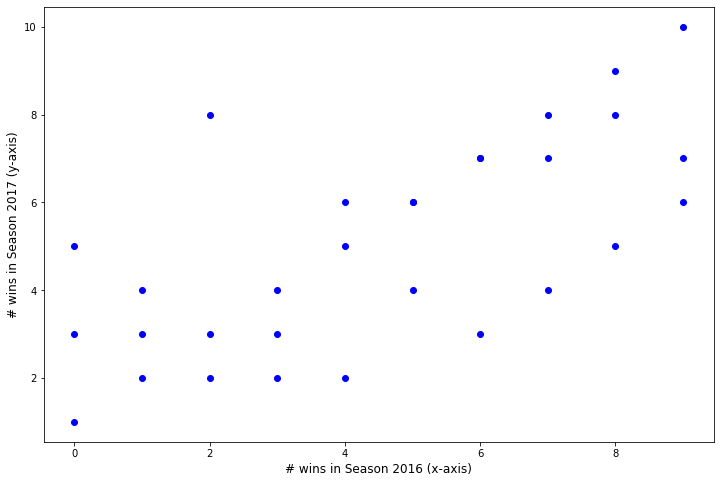

In [7]:
fig = plt.figure(figsize=(12, 8))

plt.plot(dataset, "ob") 
plt.xlabel("# wins in Season 2016 (x-axis)", fontsize=12) 
plt.ylabel("# wins in Season 2017 (y-axis)", fontsize=12) 

plt.show()

In [8]:
# Manhattan Kmeans
# maxiter: control number of iteration

def Mkmeans(instances, k, maxiter, animation=False, initCentroids=None):
    result = {}
    if (initCentroids == None or len(initCentroids) < k):
        # randomly select k initial centroids
        random.seed(time.time())
        centroids = random.sample(instances, k)
    else:
        centroids = initCentroids
    prevCentroids = []
    if animation:
        delay = 1.0 # seconds
        canvas = prepareWindow(instances)
        clusters = createEmptyListOfLists(k)
        clusters[0] = instances
        paintClusters2D(canvas, clusters, centroids, "Initial centroids")
        time.sleep(delay)
    for itr in range(maxiter):
    #iteration = 0
    #while (centroids != prevCentroids):
        #iteration += 1
        clusters = MassignAll(instances, centroids)
        
        prevCentroids = centroids
        centroids = computeCentroids(clusters)
        withinss = McomputeWithinss(clusters, centroids)
        
    result["clusters"] = clusters
    result["centroids"] = centroids
    result["withinss"] = withinss
    result["sse"]= withinss
    return result

In [27]:
initCentroids1 = [('', 4, 6),('', 5, 4)]

clustering = Mkmeans(data, 2, 1, animation=False, initCentroids=initCentroids1)

c = clustering["clusters"]

print('\n')

printTable(clustering["centroids"])

print("=="*50)

print('Centroids assigned to two clusters are:')
print("--"*40)
print('cluster 1:', c[0])
print("--"*40)
print('cluster 2:', c[1])



centroid0	4.00 6.33 
centroid1	5.57 3.57 
Centroids assigned to two clusters are:
--------------------------------------------------------------------------------
cluster 1: [(1.0, 3.0, 5.0), (3.0, 2.0, 8.0), (10.0, 7.0, 6.0)]
--------------------------------------------------------------------------------
cluster 2: [(2.0, 3.0, 4.0), (4.0, 2.0, 3.0), (5.0, 6.0, 2.0), (6.0, 6.0, 4.0), (7.0, 7.0, 3.0), (8.0, 7.0, 4.0), (9.0, 8.0, 5.0)]


### 2. Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [9]:
# Euclidean Kmeans
# maxiter: control number of iteration

def Ekmeans(instances, k, maxiter, animation=False, initCentroids=None):
    result = {}
    if (initCentroids == None or len(initCentroids) < k):
        # randomly select k initial centroids
        random.seed(time.time())
        centroids = random.sample(instances, k)
    else:
        centroids = initCentroids
    prevCentroids = []
    if animation:
        delay = 1.0 # seconds
        canvas = prepareWindow(instances)
        clusters = createEmptyListOfLists(k)
        clusters[0] = instances
        paintClusters2D(canvas, clusters, centroids, "Initial centroids")
        time.sleep(delay)
    for itr in range(maxiter):
    #iteration = 0
    #while (centroids != prevCentroids):
        #iteration += 1
        clusters = assignAll(instances, centroids)
        
        prevCentroids = centroids
        centroids = computeCentroids(clusters)
        withinss = computeWithinss(clusters, centroids)
        
    result["clusters"] = clusters
    result["centroids"] = centroids
    result["withinss"] = withinss
    result["sse"]= withinss
    return result

In [29]:
initCentroids2 = [('', 4, 6), ('', 5, 4)]

clustering = Ekmeans(data, 2, 1, animation=False, initCentroids=initCentroids1)

c = clustering["clusters"]

print('\n')

printTable(clustering["centroids"])

print("=="*50)

print('Centroids assigned to two clusters are:')
print("--"*40)
print('cluster 1:', c[0])
print("--"*40)
print('cluster 2:', c[1])



centroid0	2.50 6.50 
centroid1	5.75 3.88 
Centroids assigned to two clusters are:
--------------------------------------------------------------------------------
cluster 1: [(1.0, 3.0, 5.0), (3.0, 2.0, 8.0)]
--------------------------------------------------------------------------------
cluster 2: [(2.0, 3.0, 4.0), (4.0, 2.0, 3.0), (5.0, 6.0, 2.0), (6.0, 6.0, 4.0), (7.0, 7.0, 3.0), (8.0, 7.0, 4.0), (9.0, 8.0, 5.0), (10.0, 7.0, 6.0)]


### 3. Initialize with two centroids, $(3, 3)$ and $(8, 3)$. Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [30]:
initCentroids3 = [('', 3, 3),('', 8, 3)]

clustering = Mkmeans(data, 2, 1, animation=False, initCentroids=initCentroids3)

c = clustering["clusters"]

print('\n')

printTable(clustering["centroids"])
print("=="*50)

print('Centroids assigned to two clusters are:')
print("--"*40)
print('cluster 1:', c[0])
print("--"*40)
print('cluster 2:', c[1])




centroid0	2.50 5.00 
centroid1	6.83 4.00 
Centroids assigned to two clusters are:
--------------------------------------------------------------------------------
cluster 1: [(1.0, 3.0, 5.0), (2.0, 3.0, 4.0), (3.0, 2.0, 8.0), (4.0, 2.0, 3.0)]
--------------------------------------------------------------------------------
cluster 2: [(5.0, 6.0, 2.0), (6.0, 6.0, 4.0), (7.0, 7.0, 3.0), (8.0, 7.0, 4.0), (9.0, 8.0, 5.0), (10.0, 7.0, 6.0)]


### 4. Initialize with two centroids, $(3, 2)$ and $(4, 8)$. Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [53]:
initCentroids4 = [('', 3, 2), ('', 4, 8)]

clustering = Mkmeans(data, 2, 1, animation=False, initCentroids=initCentroids4)

c = clustering["clusters"]

print('\n')

printTable(clustering["centroids"])

print("=="*50)

print('Centroids assigned to two clusters are:')
print("--"*40)
print('cluster 1:', c[0])
print("--"*40)
print('cluster 2:', c[1])



centroid0	4.86 3.57 
centroid1	5.67 6.33 
Centroids assigned to two clusters are:
--------------------------------------------------------------------------------
cluster 1: [(1.0, 3.0, 5.0), (2.0, 3.0, 4.0), (4.0, 2.0, 3.0), (5.0, 6.0, 2.0), (6.0, 6.0, 4.0), (7.0, 7.0, 3.0), (8.0, 7.0, 4.0)]
--------------------------------------------------------------------------------
cluster 2: [(3.0, 2.0, 8.0), (9.0, 8.0, 5.0), (10.0, 7.0, 6.0)]


In [39]:
dataset.head()

team  wins_2016  wins_2017
0     1          3          5
1     2          3          4
2     3          2          8
3     4          2          3
4     5          6          2

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   team       10 non-null     int64
 1   wins_2016  10 non-null     int64
 2   wins_2017  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [41]:
dataset.columns = dataset.columns.str.strip()

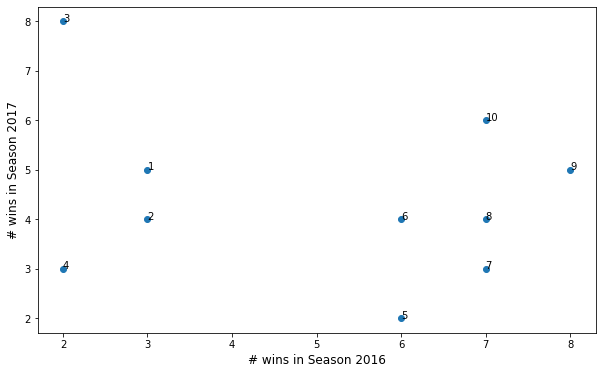

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = dataset.set_index('wins_2016')['wins_2017'].plot(style='o')

def label_point(x, y, Team, ax):
    a = pd.concat({'x': x, 'y': y, 'Team': Team}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['Team']))

label_point(dataset.wins_2016, dataset.wins_2017, dataset.team, ax)

ax.set_xlabel("# wins in Season 2016", fontsize=12)
ax.set_ylabel("# wins in Season 2017", fontsize=12)

plt.show()

## Task 2: K-Means Clustering with Real World Dataset 

First, download the Iris data set from: https://archive.ics.uci.edu/ml/datasets/Iris. Then, implement the K-means algorithm. K-means algorithm computes the distance of a given data point pair. Replace the distance computation function with Euclidean distance, 1- Cosine similarity, and 1 – the Generalized Jarcard similarity
(https://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/jaccard.htm).

In [10]:
iris = pd.read_csv("Data/iris.csv")

In [11]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [59]:
# initial centroids 
def get_initial_centroids(X, k):
    n_samples = X.shape[0]
    ids = random.sample(range(0, n_samples), k)

    centroids = [tuple(X[id]) for id in ids]
    unique_centroids = list(set(centroids))

    n_unique_centroids = len(unique_centroids)

    while n_unique_centroids < k:
        new_ids = random.sample(range(0, n_samples), k - n_unique_centroids)
        new_centroids = [tuple(X[id]) for id in new_ids]
        unique_centroids = list(set(unique_centroids + new_centroids))

        n_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

# euclidean, cosine, jaccard
def get_distance(A_matrix, B_matrix, function):
    if function == 'jaccard':
        result = []
        for p in A_matrix:
            jaccards = []
            for c in B_matrix:
                dist = 1 - ((min(p[1], c[1]) + min(p[0], c[0]))/(max(p[1], c[1]) + max(p[0], c[0])))
                jaccards.append(dist)
            result.append(jaccards)
        return np.array(result)
    else:
        return cdist(A_matrix, B_matrix, function)

def get_clusters(X, centroids, distance_function):
    k = centroids.shape[0]
    clusters = {}
    distance_matrix = get_distance(X, centroids, distance_function)
    closest_cluster_ids = np.argmin(distance_matrix, axis=1)
    for i in range(k):
        clusters[i] = []
    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(X[i])
    return clusters

def has_centroids_covered(previous_centroids, new_centroids, distance_function, movement_threshold_delta):
    distance = get_distance(previous_centroids, new_centroids, distance_function)
    centroids_covered = np.max(distance.diagonal()) <= movement_threshold_delta

    return centroids_covered

def K_Means(X, k, distance_function, movement_threshold_delta=0):
    new_centroids = get_initial_centroids(X=X, k=k)

    centroids_covered = False

    while not centroids_covered:
        previous_centroids = new_centroids
        clusters = get_clusters(X, previous_centroids, distance_function)

        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])

        centroids_covered = has_centroids_covered(previous_centroids, new_centroids, distance_function, movement_threshold_delta)

    return new_centroids

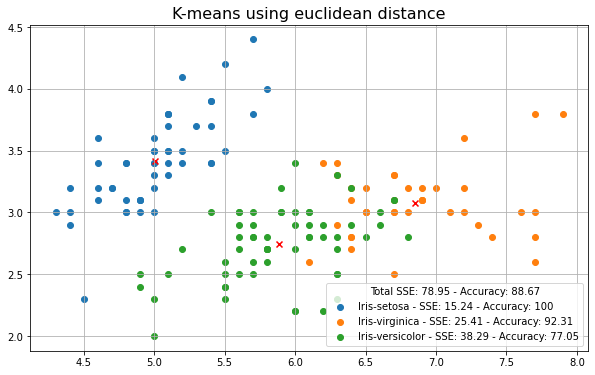

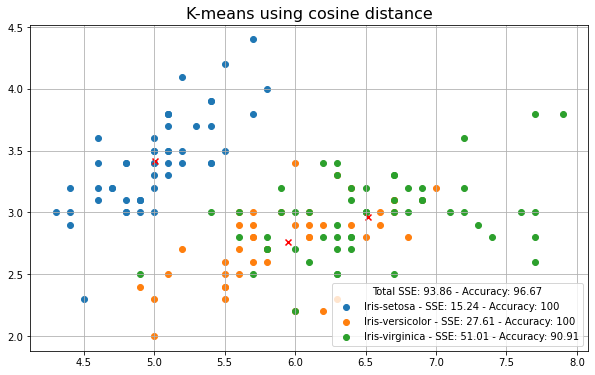

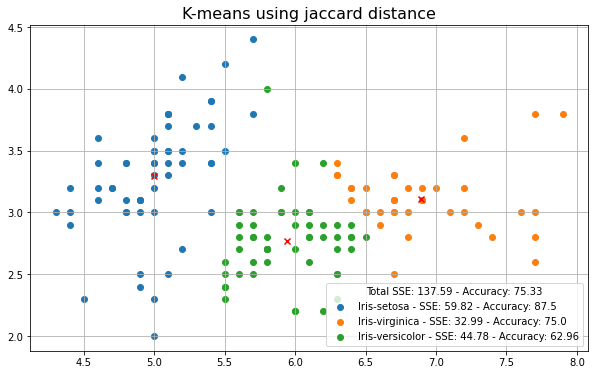

In [72]:
plt.rcParams['figure.figsize'] = [10, 6]

k = 3

params = [
    {
        'method': 'euclidean',
        'delta': 0
    },
    {
        'method': 'cosine',
        'delta': 0.0001
    },
    {
        'method': 'jaccard',
        'delta': 0.0001
    }
]


for n in params:
    no_label = iris[['sepal_length','sepal_width','petal_length','petal_width']]
    centroids = K_Means(no_label.to_numpy(), k, n['method'], movement_threshold_delta=n['delta'])
    clusters = get_clusters(no_label.to_numpy(), centroids, n['method'])
    scatters = []
    errors = []
    for centroid, points in clusters.items():
        points = np.array(points)
        centroid = np.mean(points, axis=0)
        dists = cdist(points, np.array([centroid]), 'euclidean')
        sum = 0
        labels = []
        for p in points:
            realLabel = iris.loc[(iris['sepal_length'] == p[0]) & (iris['sepal_width'] == p[1]) & (iris['petal_length'] == p[2]) & 
                                 (iris['petal_width'] == p[3])].iloc[0]['label']
            labels.append(realLabel)
        labels = np.array(labels)
        labels, counts = np.unique(labels, return_counts=True)
        realLabel = labels[counts == counts.max()][0]
        accuracy = 0
        goods = 0
        total = 0
        if len(labels) == 1:
            accuracy = 100
            goods = np.sum(counts)
            total = goods
        else:
            total = np.sum(counts)
            goods = counts[labels == realLabel][0]
            accuracy = (goods/total)*100
        accuracy = round(accuracy, 2)
        for d in dists:
            sum += d[0]**2
        scatter = plt.scatter(points[:, 0], points[:, 1], marker='o')
        scatters.append(scatter)
        errors.append((sum, realLabel, (total, goods, accuracy)))
        plt.grid()
        plt.scatter(centroid[0], centroid[1], marker='x', color="red")
    plt.title(f'K-means using {n["method"]} distance', fontsize=16)
    legends = map((lambda x: str(x[1]) + ' - SSE: ' + str(round(x[0], 2)) + ' - Accuracy: ' + str(x[2][2])), errors)
    sse = np.sum(list(map(lambda x: x[0], errors)))
    totalGoods = np.sum(list(map(lambda x: x[2][1], errors)))
    totalPts = np.sum(list(map(lambda x: x[2][0], errors)))
    plt.legend(scatters, legends, loc="lower right", title='Total SSE: ' + str(round(sse, 2)) + ' - Accuracy: ' + str(round((totalGoods/totalPts)*100, 2)))
    plt.savefig(f"K-means using {n['method']} distance", dpi=300)
    plt.show()

Based on the information and graphs above, we can answer the follwing questions.

**Q1. Run K-means clustering with Euclidean, Cosine and Jarcard similarity. Specify K= the number of categorical values of y (the variable of label). Compare the SSEs of Euclidean-Kmeans Cosine-K-means, Jarcard-K-means. Which method is better?**

- Euclidean K-means is a better method because it has a lower SSE than the Cosine and Jaccard methods.

**Q2. Compare the accuracies of Euclidean-K-means Cosine-K-means, Jarcard-K-means. First, label each cluster with the label of the highest votes. Later, compute the accuracy of the Kmeans with respect to the three similarity metrics. Which metric is better?** 

- Even though it has a higher SSE, Cosine K-means have a better overall accuracy than the Euclidean and Jaccard methods.

**Q3. Which of Euclidean-K-means, Cosine-K-means, Jarcard-K-means requires more iterations and times?**

- Jaccard K-means seems to require more iterations than the Euclidean and Cosine methods.

**Q4. Compare the SSEs of Euclidean-K-means Cosine-K-means, Jarcard-K-means with respect to the following three terminating conditions:** 

**(a) when there is no change in centroid position** 

- Euclidean K-means performs best when there is no change in centroid position.
 
**(b) when the SSE value increases in the next iteration** 

- Euclidean K-means is the best choice when SSE increases in the next iteration.

**(c) when the maximum preset value (100) of iteration is complete** 

- Euclidean K-means method is the best choice with the best SSE after 100 iterations.

**(d) Which method requires more time or more iterations?** 

- Jaccard K-means requires more iterations.

## Task 3

There are two clusters A (red) and B (blue), each has four members and plotted in Figure. The coordinates of each member are labeled in the figure. Compute the distance between two clusters using Euclidean distance. 

<img src="Task 3.png">

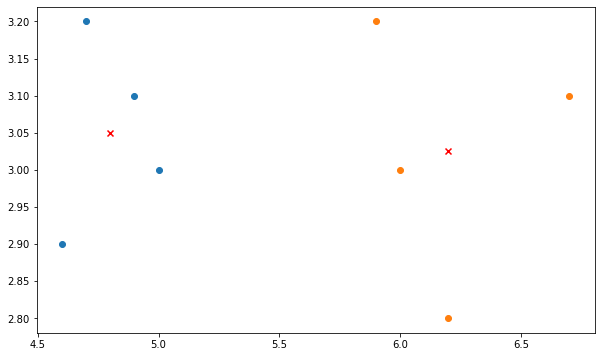

Euclidean distance between two farthest points: 2.1095
Euclidean distance between two closest points: 0.922
Average distance between all pairs: 1.4129


In [74]:
# Euclidean distance

clusterA = np.array([[4.7,3.2], [4.9,3.1], [5.0,3.0], [4.6,2.9]])
clusterB = np.array([[5.9,3.2], [6.7,3.1], [6.0,3.0], [6.2,2.8]])

clusters = [
    {
        'points': clusterA,
        'centroid': np.mean(clusterA, axis=0)
    },
    {
        'points': clusterB,
        'centroid': np.mean(clusterB, axis=0)
    }
]

for c in clusters:
    scatter = plt.scatter(c['points'][:, 0], c['points'][:, 1], marker='o')
    plt.grid()
    plt.scatter(c['centroid'][0], c['centroid'][1], marker='x', color="red")

plt.savefig("Task3.png", dpi=300)
plt.show()

dist = cdist(clusterA, clusterB, 'euclidean')
print(f'Euclidean distance between two farthest points: {round(np.max(dist), 4)}')
print(f'Euclidean distance between two closest points: {round(np.min(dist), 4)}')
print(f'Average distance between all pairs: {round(np.mean(dist), 4)}')

Based on the results obtained above, we can answer the following questions.

**A. What is the distance between the two farthest members? (round to four decimal places here, and next 2 problems).** 

-  Euclidean distance between two farthest points: 2.1095

**B. What is the distance between the two closest members?** 

- Euclidean distance between two closest points: 0.922 

**C. What is the average distance between all pairs?** 

- Average distance between all pairs: 1.4129

**D. Discuss which distance (A, B, C) is more robust to noises in this case?** 

- The group average is more robust to noises and outliers.